In [3]:
#Read in the Excel Spreadsheet

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


SR_file_path = 'nsf_2d_workshop_2018/SmB6_data/SR-Publication/Figure_S5.xlsx'

SR_excel = pd.ExcelFile(SR_file_path)

print(SR_excel.sheet_names)

['Sheet1']


In [4]:
#load the sheet for fig 1 into a pandas data frame

FigS5_df = SR_excel.parse(SR_excel.sheet_names[0])

FigS5_df

,Element,Atomic Number,Polycrystalline Rod,Cut 1,Cut 2,Cut 3
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Li,3.0,<0.05,<0.05,<0.05,<0.05
2,Be,4.0,<0.05,<0.05,<0.05,<0.05
3,B,5.0,Bulk,Bulk,Bulk,Bulk
4,F,9.0,<1,2.2,<1,<1
5,Na,11.0,4.7,0.97,2.4,0.83
6,Mg,12.0,0.95,1.1,0.91,0.47
7,Al,13.0,48,42,27,0.99
8,Si,14.0,54,140,35,110
9,P,15.0,0.78,4.3,1.1,0.52


In [5]:
trimmed = FigS5_df.drop([0])
trimmed

,Element,Atomic Number,Polycrystalline Rod,Cut 1,Cut 2,Cut 3
1,Li,3.0,<0.05,<0.05,<0.05,<0.05
2,Be,4.0,<0.05,<0.05,<0.05,<0.05
3,B,5.0,Bulk,Bulk,Bulk,Bulk
4,F,9.0,<1,2.2,<1,<1
5,Na,11.0,4.7,0.97,2.4,0.83
6,Mg,12.0,0.95,1.1,0.91,0.47
7,Al,13.0,48,42,27,0.99
8,Si,14.0,54,140,35,110
9,P,15.0,0.78,4.3,1.1,0.52
10,S,6.0,30,62,9.1,34


In [6]:
trimmed.columns

Index(['Element', 'Atomic Number', 'Polycrystalline Rod', 'Cut 1', 'Cut 2',
       'Cut 3'],
      dtype='object')

In [14]:
atomic_num = trimmed['Atomic Number'].values.astype('float')
starting_mat = trimmed['Polycrystalline Rod'].values
starting_mat
#plt.scatter(trimmed['Atomic Number'], trimmed['Polycrystalline Rod'])

array(['<0.05', '<0.05', 'Bulk', '<1', 4.7, 0.95, 48, 54, 0.78, 30, '~10',
       6.1, 160, 0.06, 29, 10, 35, 0.65, 290, 0.64, 13, 17, 6.5, '<0.5',
       '<0.5', '<5', '<5', '<0.5', '<0.05', 10, 12, 15, 1.8, 3.8, '<0.05',
       '<1', '<1', 5.2, '<5', 'Binder', '<1', '<0.1', 4.2, 1.8, '<5', 700,
       670, 37, 210, 410, 'Bulk', 13, 310, 13, 50, 0.48, 5.1, 0.95, 3.2,
       0.94, 4.1, '≤70', 4.7, '<0.1', '<0.1', '<0.1', 1.8, '<5', '<0.5',
       '<0.01', '<0.05', '<0.05', 0.04, 0.03], dtype=object)

In [38]:
# we need to clean up the data!

for i in range(2, len(trimmed.columns)):
    cur_column_name = trimmed.columns[i]
    cur_column = trimmed[cur_column_name].values.astype('str')

    for index in range(len(cur_column)):
        if '<' in cur_column[index]:
            cur_column[index] = cur_column[index].replace('<', '')
        if '~' in cur_column[index]:
            cur_column[index] = cur_column[index].replace('~', '')
        if 'Bulk' in cur_column[index]:
            cur_column[index] = '-1'
        if 'Binder' in cur_column[index]:
            cur_column[index] = '-1'
        if '≤' in cur_column[index]:
            cur_column[index] = cur_column[index].replace('≤', '')
    
    trimmed[cur_column_name] = cur_column.astype('float')

trimmed

,Element,Atomic Number,Polycrystalline Rod,Cut 1,Cut 2,Cut 3
1,Li,3.0,0.05,0.05,0.05,0.05
2,Be,4.0,0.05,0.05,0.05,0.05
3,B,5.0,-1.00,-1.00,-1.00,-1.00
4,F,9.0,1.00,2.20,1.00,1.00
5,Na,11.0,4.70,0.97,2.40,0.83
6,Mg,12.0,0.95,1.10,0.91,0.47
7,Al,13.0,48.00,42.00,27.00,0.99
8,Si,14.0,54.00,140.00,35.00,110.00
9,P,15.0,0.78,4.30,1.10,0.52
10,S,6.0,30.00,62.00,9.10,34.00


(0, 800)

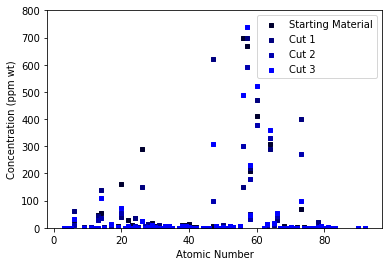

In [61]:
x = trimmed['Atomic Number']
y1 = trimmed['Polycrystalline Rod']
y2 = trimmed['Cut 1']
y3 = trimmed['Cut 2']
y4 = trimmed['Cut 3']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, marker='s', s=10, c='#00002F', label='Starting Material')
ax1.scatter(x, y2, marker='s', s=10, c='#00007F', label='Cut 1')
ax1.scatter(x, y3, marker='s', s=10, c='#0000AF', label='Cut 2')
ax1.scatter(x, y4, marker='s', s=10, c='#0000FF', label='Cut 3')

plt.legend(loc='upper right')

y_label = 'Concentration (ppm wt)'
x_label = 'Atomic Number'
ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)
ax1.set_ylim(bottom=0, top=800)